In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning',
 '/opt/conda/lib/python38.zip',
 '/opt/conda/lib/python3.8',
 '/opt/conda/lib/python3.8/lib-dynload',
 '',
 '/home/blessyantony/.local/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages/IPython/extensions',
 '/home/blessyantony/.ipython',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../..']

In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.metrics import roc_curve, accuracy_score, f1_score, auc, precision_recall_curve
from statistics import mean

from src.utils import utils, evaluation_utils, visualization_utils

In [4]:
tf_output_file_path = os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_non_idv/20240610/host_multi/few_shot_learning/fsl_non_idv_uniref90viridae_msl2048_transformer-l_6-h_8-d_1024-lr1e-4_classwise_auprc.csv")
virprobert_output_file_path = os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_non_idv/20240612/host_multi/few_shot_learning/fsl_non_idv_uniref90viridae_msl2048_virprobert_classwise_auprc.csv")

output_file_paths = {
   # "TF": tf_output_file_path,
    "VirProBERT": virprobert_output_file_path
}

In [5]:
def read_output_df(output_file_paths):
    dfs = []
    for model, output_file_path in output_file_paths.items():
        df = pd.read_csv(output_file_path, index_col=0)
        df = df[df["itr"].isin(range(3))]
        df["model"] = model
        dfs.append(df)
    return pd.concat(dfs)

In [6]:
df = read_output_df(output_file_paths)

In [7]:
classes = df["class"].sort_values().unique()
classes

array(['Acanthorhynchus tenuirostris', 'Acinonyx jubatus',
       'Aegithalos caudatus', 'Ailurus fulgens', 'Amazona oratrix',
       'Anas castanea', 'Anser indicus', 'Arctocephalus australis',
       'Blarina brevicauda', 'Bos taurus', 'Cairina moschata',
       'Capra hircus', 'Cecropis daurica', 'Centropristis striata',
       'Chelonia mydas', 'Chenonetta jubata', 'Chimaera sp.',
       'Coelorinchus multispinulosus', 'Coendou prehensilis',
       'Corynorhinus rafinesquii', 'Desmodus rotundus', 'Eidolon helvum',
       'Elephas maximus', 'Emberiza chrysophrys', 'Emberiza rustica',
       'Eonycteris spelaea', 'Equus asinus', 'Equus caballus',
       'Erinaceus europaeus', 'Felis catus', 'Felis domesticus',
       'Ficedula parva', 'Gallus gallus', 'Gallus gallus domesticus',
       'Gorilla gorilla', 'Hydrochoerus hydrochaeris', 'Hypsugo savii',
       'Lanius cristatus', 'Macaca arctoides', 'Mandrillus sphinx',
       'Martes martes', 'Mastomys natalensis', 'Miniopterus fuligino

In [8]:
import math

def get_uniformly_divided_position_bins(positions, n_bins):
    bin_width = math.floor(len(positions)/n_bins)
    bins = []
    start = 0
    for i in range(n_bins):
        end = start + bin_width
        bins.append(positions[start:end])
        start = end
    return bins

<Figure size 432x288 with 0 Axes>

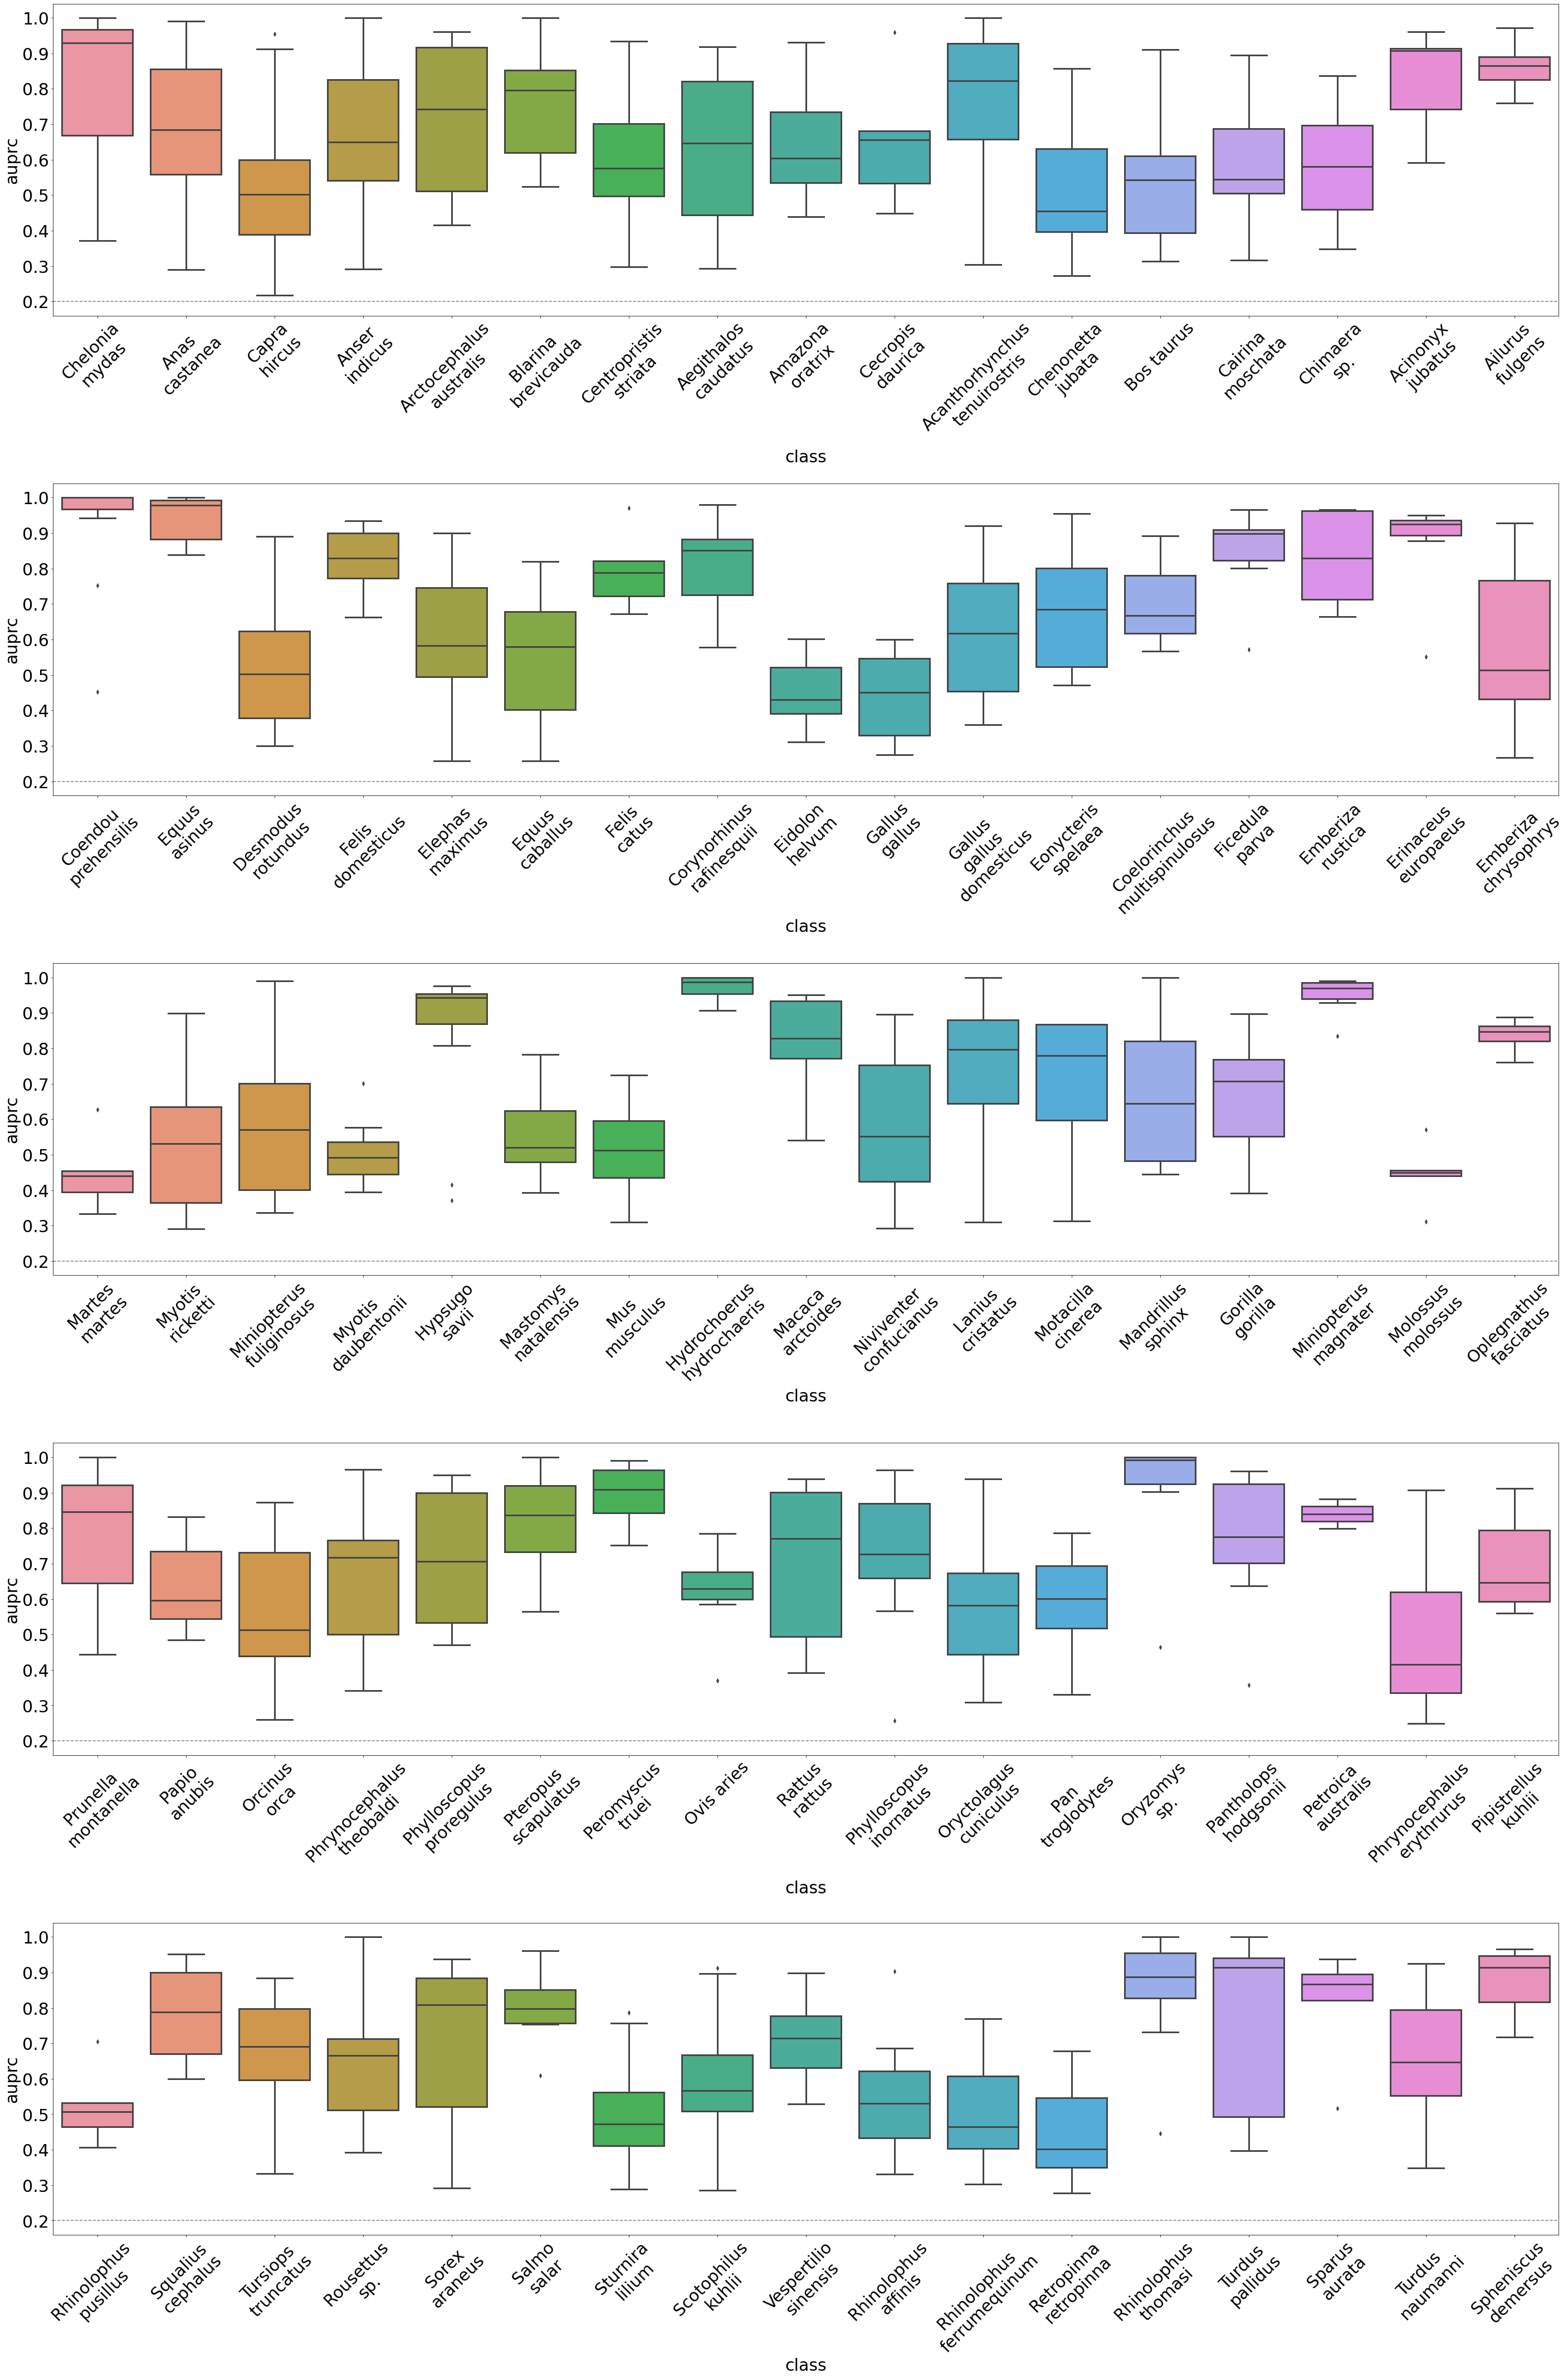

In [11]:
# plt.rcParams['xtick.labelsize'] = 15
# plt.rcParams['ytick.labelsize'] = 15


# DEFAULT_FIGURE_CONFIG = {
#     "figsize": (16, 8),
#     "xtick.labelsize": 15,
#     "ytick.labelsize": 15    
# }

plt.rcParams['figure.autolayout'] = True
plt.clf()
fig, axs = plt.subplots(5, 1, figsize=(40, 60), sharey=True)
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams.update({'font.size': 30})


bins = get_uniformly_divided_position_bins(list(classes), 5)

for i in range(5):
    sns.boxplot(data=df[df["class"].isin(bins[i])],  y="auprc", x="class", ax=axs[i], orient="v", 
                linewidth=3,)
    #sns.stripplot(data=df[df["class"].isin(bins[i])], x="class", y="auprc", ax=axs[i])
    visualization_utils.wrap_ticklabels(axs[i], axis="x")
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].axhline(0.2, color="gray", linestyle="--")

plt.show()

<Figure size 432x288 with 0 Axes>

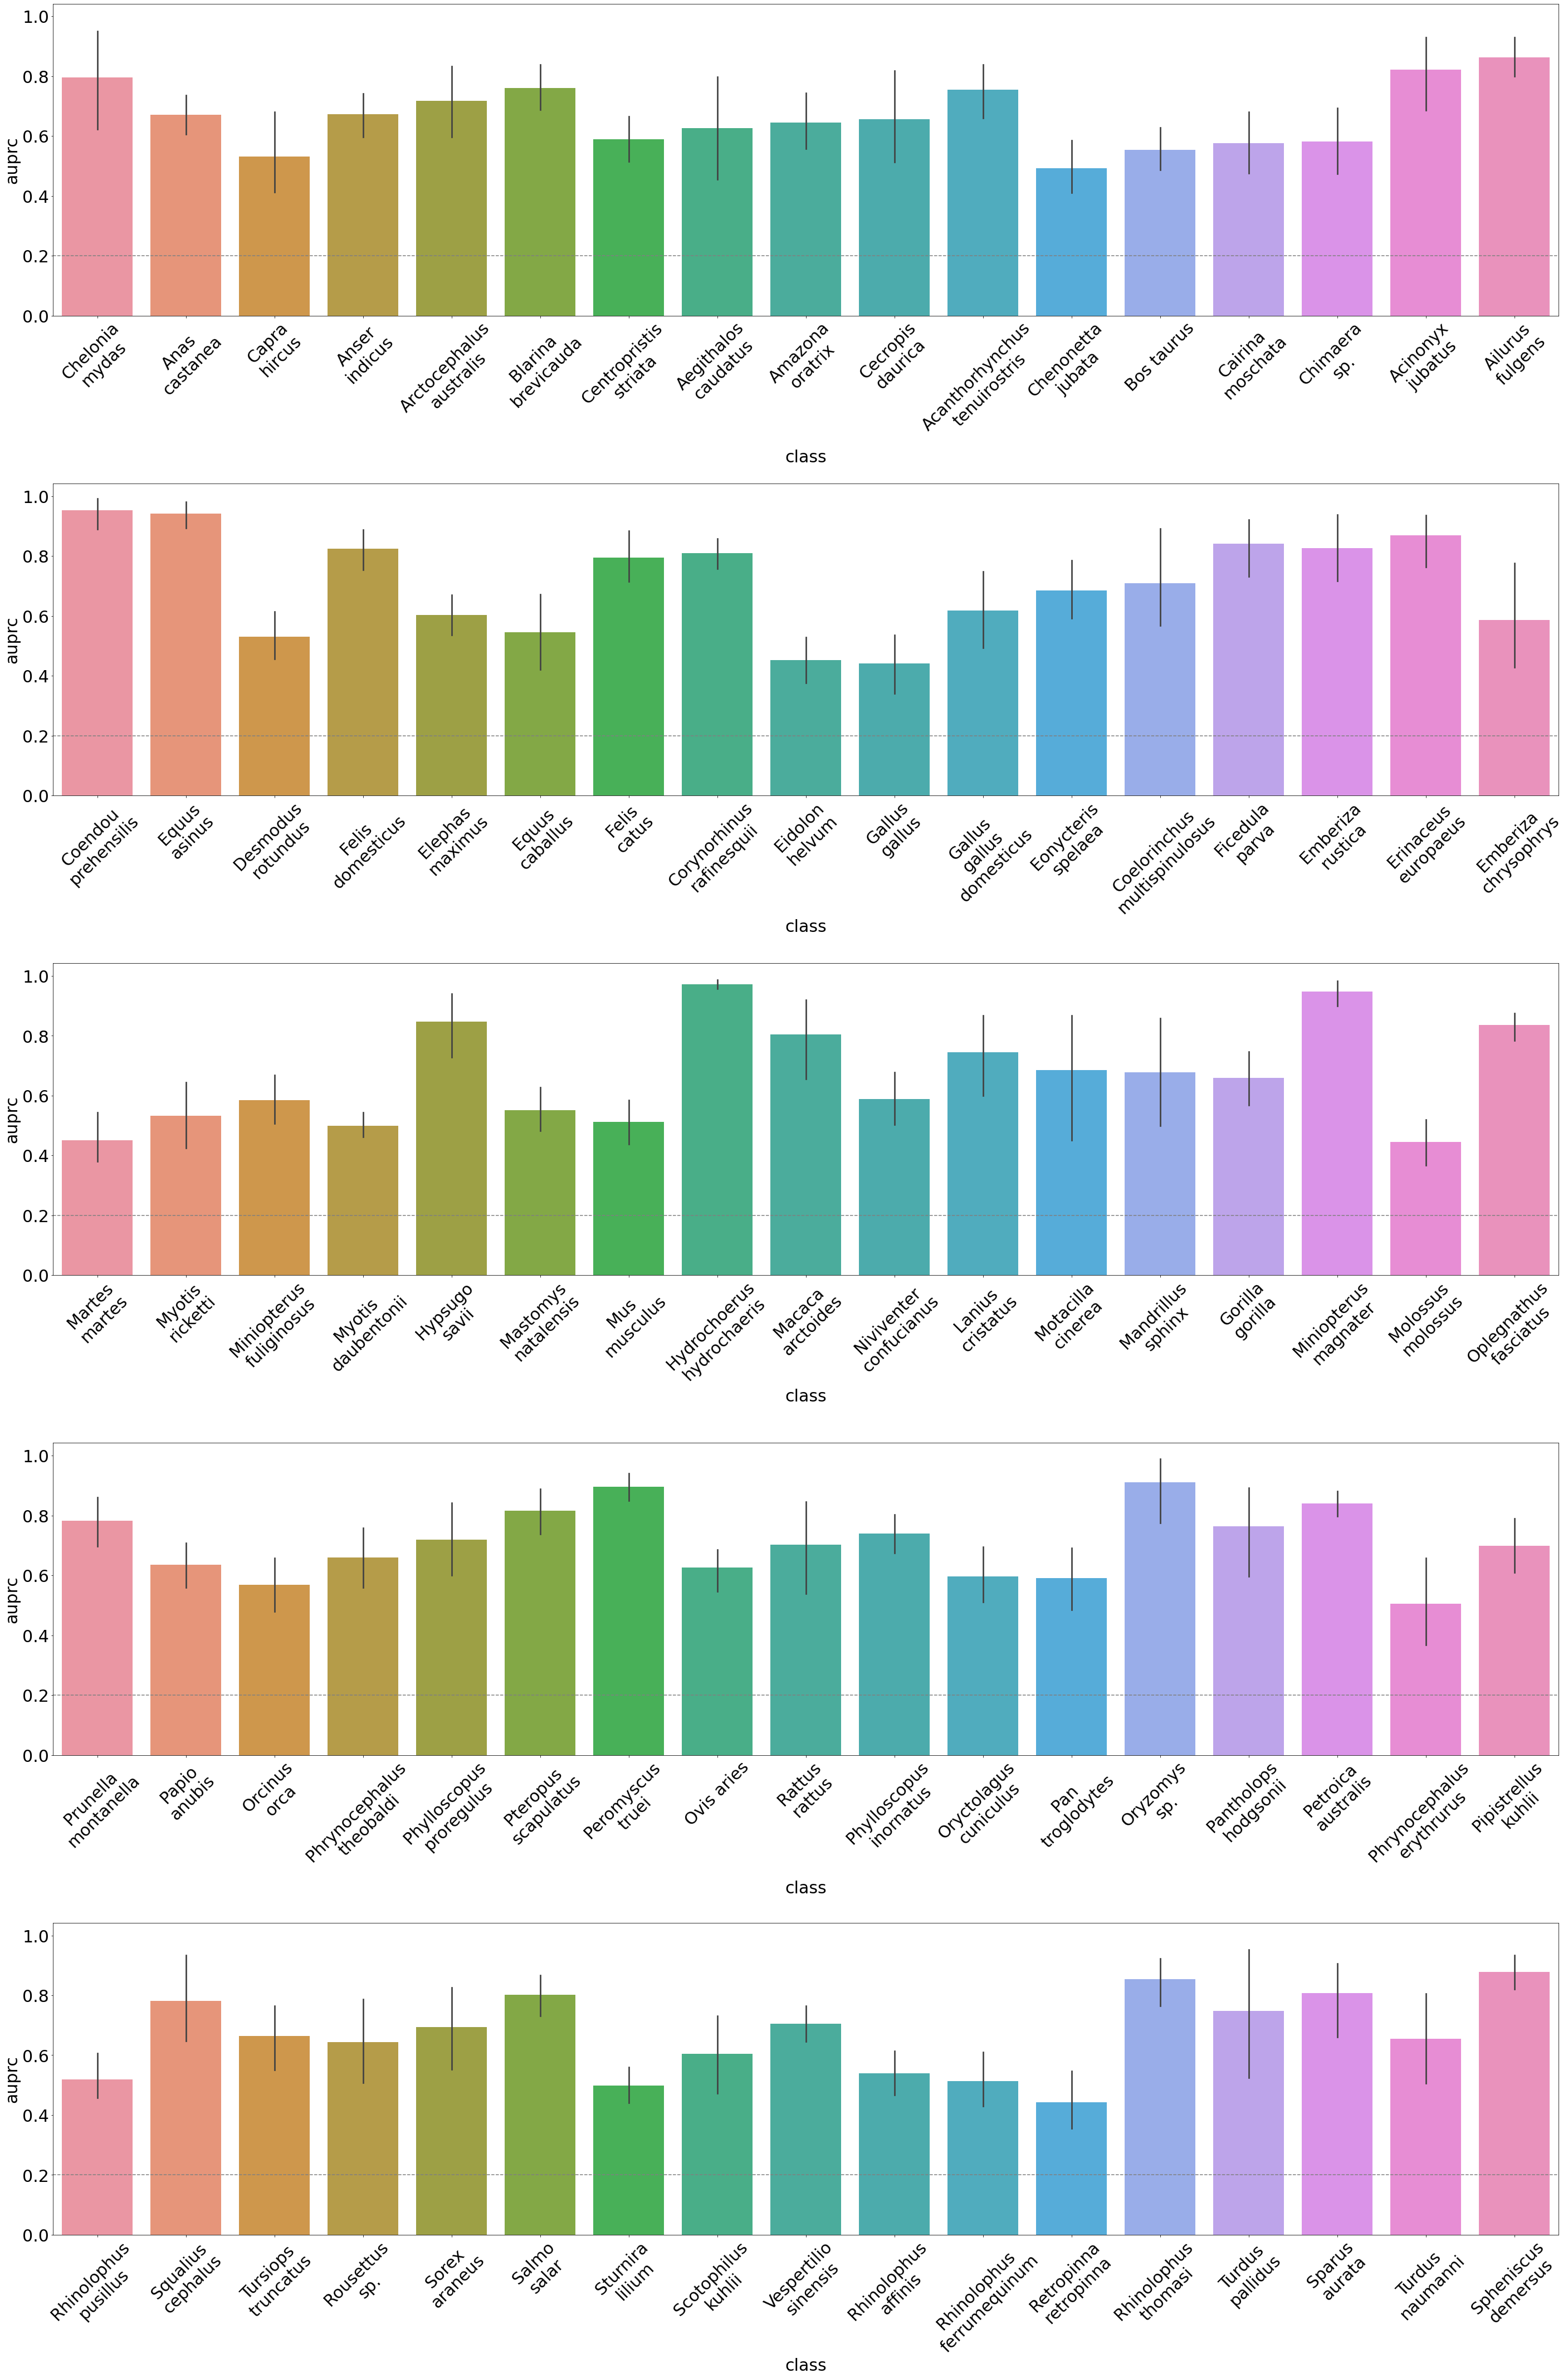

In [10]:
plt.rcParams['figure.autolayout'] = True
plt.clf()
fig, axs = plt.subplots(5, 1, figsize=(40, 60), sharey=True)
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams.update({'font.size': 30})


bins = get_uniformly_divided_position_bins(list(classes), 5)

for i in range(5):
    sns.barplot(data=df[df["class"].isin(bins[i])],  y="auprc", x="class",  ax=axs[i], orient="v", 
                linewidth=3,)
    #sns.stripplot(data=df[df["class"].isin(bins[i])], x="class", y="auprc", ax=axs[i])
    visualization_utils.wrap_ticklabels(axs[i], axis="x")
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].axhline(0.2, color="gray", linestyle="--")

plt.show()